In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 6
dim = 30
numRuns = 51
pop_size = 300
percMaxEvals = 0.6
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[6_30_51_300_0.6_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[6_30_51_300_0.6_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	612.2184

Best Fitness:	609.1655
Solution:	600.0000
Diff:		9.1655

[0:25:17][----------] 1.96% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	633.8495

Best Fitness:	626.1834
Solution:	600.0000
Diff:		26.1834

[0:48:39][----------] 3.92% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	623.9307

Best Fitness:	619.7212
Solution:	600.0000
Diff:		19.7212

[1:10:38][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	619.3773

Best Fitness:	614.5777
Solution:	600.0000
Diff:		14.5777

[1:33:44][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	631.7119

Best Fitness:	625.4505
Solution:	600.0000
Diff:		25.4505

[1:55:58][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	614.0041

Best Fitness:	610.9579
Solution:	600.0000
Diff:		10.9579

[2:18:30][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	618.9051

Best Fitness:	615.4405
Solution:	600.0000
Diff:		15.4405

[2:41:43][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	616.4665

Best Fitness:	613.3305
Solution:	600.0000
Diff:		13.3305

[3:02:15][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	611.9963

Best Fitness:	609.9275
Solution:	600.0000
Diff:		9.9275

[3:22:21][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	618.9271

Best Fitness:	615.3824
Solution:	600.0000
Diff:		15.3824

[3:42:15][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	617.1140

Best Fitness:	613.3743
Solution:	600.0000
Diff:		13.3743

[4:02:12][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	616.5335

Best Fitness:	613.4286
Solution:	600.0000
Diff:		13.4286

[4:21:42][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	623.6120

Best Fitness:	618.8337
Solution:	600.0000
Diff:		18.8337

[4:41:40][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	623.4935

Best Fitness:	619.3146
Solution:	600.0000
Diff:		19.3146

[5:01:35][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	612.8979

Best Fitness:	610.4645
Solution:	600.0000
Diff:		10.4645

[5:21:46][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	615.5504

Best Fitness:	613.0493
Solution:	600.0000
Diff:		13.0493

[5:40:44][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	620.4659

Best Fitness:	616.9491
Solution:	600.0000
Diff:		16.9491

[5:58:47][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	631.2035

Best Fitness:	623.6994
Solution:	600.0000
Diff:		23.6994

[6:16:26][####------] 35.29% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	609.6883

Best Fitness:	607.8764
Solution:	600.0000
Diff:		7.8764

[6:34:17][####------] 37.25% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	625.7748

Best Fitness:	621.5545
Solution:	600.0000
Diff:		21.5545

[6:51:48][####------] 39.22% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	611.2401

Best Fitness:	608.9165
Solution:	600.0000
Diff:		8.9165

[7:09:02][####------] 41.18% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	615.3868

Best Fitness:	613.2853
Solution:	600.0000
Diff:		13.2853

[7:26:51][####------] 43.14% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	618.2513

Best Fitness:	614.6476
Solution:	600.0000
Diff:		14.6476

[7:44:39][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	616.5619

Best Fitness:	613.5060
Solution:	600.0000
Diff:		13.5060

[8:02:15][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	623.0904

Best Fitness:	619.0170
Solution:	600.0000
Diff:		19.0170

[8:19:17][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	622.7416

Best Fitness:	618.7752
Solution:	600.0000
Diff:		18.7752

[8:35:02][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	627.9794

Best Fitness:	622.6165
Solution:	600.0000
Diff:		22.6165

[8:50:31][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	626.0598

Best Fitness:	620.2786
Solution:	600.0000
Diff:		20.2786

[9:05:40][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	617.9955

Best Fitness:	613.3877
Solution:	600.0000
Diff:		13.3877

[9:21:11][######----] 56.86% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	620.1935

Best Fitness:	615.6775
Solution:	600.0000
Diff:		15.6775

[9:36:44][######----] 58.82% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	633.7337

Best Fitness:	627.9654
Solution:	600.0000
Diff:		27.9654

[9:52:35][######----] 60.78% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	620.4998

Best Fitness:	616.9242
Solution:	600.0000
Diff:		16.9242

[10:08:09][######----] 62.75% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	617.4868

Best Fitness:	614.0274
Solution:	600.0000
Diff:		14.0274

[10:22:59][######----] 64.71% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	613.6570

Best Fitness:	611.4795
Solution:	600.0000
Diff:		11.4795

[10:38:42][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	631.0741

Best Fitness:	624.3857
Solution:	600.0000
Diff:		24.3857

[10:53:18][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	636.2173

Best Fitness:	627.3935
Solution:	600.0000
Diff:		27.3935

[11:08:06][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	622.9293

Best Fitness:	618.3242
Solution:	600.0000
Diff:		18.3242

[11:22:32][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	624.4659

Best Fitness:	620.3109
Solution:	600.0000
Diff:		20.3109

[11:36:36][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	623.8625

Best Fitness:	619.9094
Solution:	600.0000
Diff:		19.9094

[11:50:02][########--] 76.47% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	619.8780

Best Fitness:	614.9901
Solution:	600.0000
Diff:		14.9901

[12:03:33][########--] 78.43% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	613.2423

Best Fitness:	610.9172
Solution:	600.0000
Diff:		10.9172

[12:16:16][########--] 80.39% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	620.7611

Best Fitness:	616.7549
Solution:	600.0000
Diff:		16.7549

[12:29:45][########--] 82.35% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	613.1141

Best Fitness:	610.8790
Solution:	600.0000
Diff:		10.8790

[12:41:47][########--] 84.31% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	625.1902

Best Fitness:	620.6760
Solution:	600.0000
Diff:		20.6760

[12:53:20][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	631.4326

Best Fitness:	626.0742
Solution:	600.0000
Diff:		26.0742

[13:04:46][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	614.6196

Best Fitness:	610.3416
Solution:	600.0000
Diff:		10.3416

[13:16:05][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	617.2444

Best Fitness:	613.6118
Solution:	600.0000
Diff:		13.6118

[13:27:14][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	621.3543

Best Fitness:	618.3136
Solution:	600.0000
Diff:		18.3136

[13:38:12][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	620.1251

Best Fitness:	616.0570
Solution:	600.0000
Diff:		16.0570

[13:48:49][##########] 96.08% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	617.1101

Best Fitness:	614.2015
Solution:	600.0000
Diff:		14.2015

[13:58:46][##########] 98.04% 

Optimization ended due to max fitness evals (max = 180000.0, curr = 179700)


#Generations:	597

#FitnessEvals:	179700

Mean Fitness:	615.3863

Best Fitness:	612.4959
Solution:	600.0000
Diff:		12.4959

[14:09:09][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

14:09:09

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
592,15.742741,13.881634,15.43466,15.178961,15.407439,14.948189,16.4213,15.947836,14.453197,15.859159,...,14.441791,15.384853,15.952608,16.124895,15.959086,14.718242,16.539780,16.544418,16.951193,50
593,15.742741,13.881634,15.43466,15.178961,15.407439,14.948189,16.4213,15.947836,14.453197,15.770601,...,14.175751,15.384853,15.952608,16.124895,15.959086,14.718242,16.539780,16.544418,16.951193,50
594,15.742741,13.881634,15.43466,15.178961,15.407439,14.948189,16.4213,14.165931,14.453197,15.095410,...,14.175751,15.384853,15.952608,16.124895,15.959086,14.718242,15.761719,16.544418,15.102774,50
595,15.742741,13.881634,15.43466,14.976189,15.407439,14.948189,16.4213,14.165931,14.453197,15.095410,...,14.175751,15.384853,15.952608,16.124895,15.959086,14.718242,15.761719,16.544418,15.102774,50
596,14.781657,13.881634,15.43466,14.976189,15.407439,14.948189,16.4213,14.165931,14.453197,15.095410,...,14.175751,15.384853,15.952608,16.124895,15.959086,14.718242,15.761719,16.544418,15.102774,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 9.16547383951297

Best error for run 1: 26.18338626348543

Best error for run 2: 19.721236372879503

Best error for run 3: 14.577702823300797

Best error for run 4: 25.45051476275853

Best error for run 5: 10.95786217800196

Best error for run 6: 15.440547602671813

Best error for run 7: 13.330506179971394

Best error for run 8: 9.927539060824074

Best error for run 9: 15.38236243993731

Best error for run 10: 13.374269008390343

Best error for run 11: 13.428637934717699

Best error for run 12: 18.833676268014415

Best error for run 13: 19.314595678641922

Best error for run 14: 10.464498786745935

Best error for run 15: 13.049292023150542

Best error for run 16: 16.94906559021888

Best error for run 17: 23.69936576322391

Best error for run 18: 7.876415770889139

Best error for run 19: 21.55451819160055

Best error for run 20: 8.91653000513736

Best error for run 21: 13.285349201894405

Best error for run 22: 14.64764571292676

Best error for run 23: 13.505951800010735

Best error for run 24: 19.016951550269937

Best error for run 25: 18.775203832162788

Best error for run 26: 22.616485737858397

Best error for run 27: 20.278589885759175

Best error for run 28: 13.38765474448337

Best error for run 29: 15.677543411739293

Best error for run 30: 27.96535283670164

Best error for run 31: 16.924186952772743

Best error for run 32: 14.027393821887927

Best error for run 33: 11.479524813152238

Best error for run 34: 24.385673670652523

Best error for run 35: 27.39353215052529

Best error for run 36: 18.32421854632264

Best error for run 37: 20.310907128926488

Best error for run 38: 19.909415599879367

Best error for run 39: 14.9901112651213

Best error for run 40: 10.917168516386596

Best error for run 41: 16.754946286530753

Best error for run 42: 10.8789645565314

Best error for run 43: 20.676032925882282

Best error for run 44: 26.074249009714322

Best error for run 45: 10.3416237287596

Best error for run 46: 13.611761907694017

Best error for run 47: 18.31360006857301

Best error for run 48: 16.05701138433335

Best error for run 49: 14.201519180429841

Best error for run 50: 12.495949737619867

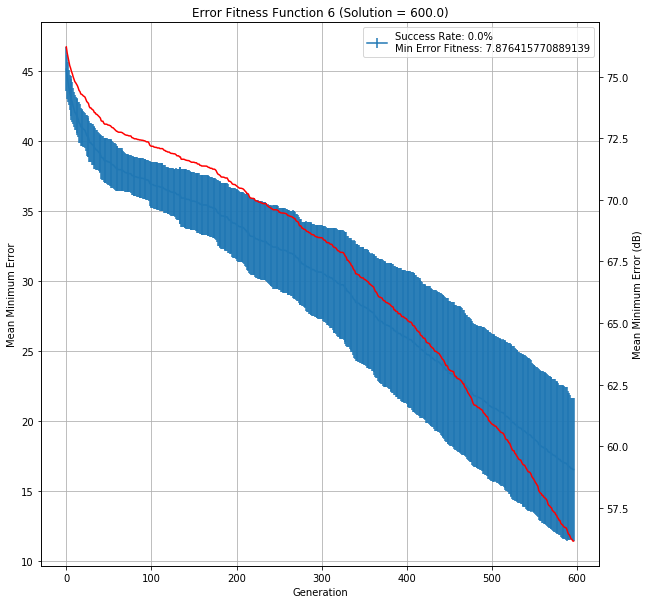

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[6_30_51_300_0.6_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,6,30,0.6,9.165474,26.183386,19.721236,14.577703,25.450515,10.957862,...,26.074249,10.341624,13.611762,18.3136,16.057011,14.201519,12.49595,16.565147,14:09:09,179700
